<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D0F5A9;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Energy Consumption <br>
    (EDA / Modeling)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Energy Consumption</div>**


## Goal
> ## EDA : Column Analysis, Column Correlation Analysis
> ## Modeling : Predicting Energy Consumption

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# For Machine Learning Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# For Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('/kaggle/input/energy-consumption-prediction/Energy_consumption_dataset.csv')
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,5000.0,6.251200,3.588687,1.000000,3.000000,6.000000,9.000000,12.000000
Hour,5000.0,11.556000,6.888306,0.000000,6.000000,11.000000,18.000000,23.000000
Temperature,5000.0,24.946823,3.041678,20.007565,22.453790,24.831846,27.427281,29.998671
Humidity,5000.0,45.478146,8.972690,30.015975,38.111104,45.793124,52.696651,59.969085
SquareFootage,5000.0,1507.403201,293.147209,1000.512661,1253.906598,1513.581105,1754.846457,1999.982252
Occupancy,5000.0,4.576000,2.906185,0.000000,2.000000,5.000000,7.000000,9.000000
RenewableEnergy,5000.0,15.201195,9.157038,0.006642,7.477928,15.343830,22.889997,29.965327
EnergyConsumption,5000.0,76.794919,9.231573,53.263278,70.419588,76.696267,83.246274,99.201120


In [5]:
df.describe(include = 'object').T

,count,unique,top,freq
DayOfWeek,5000,7,Saturday,741
Holiday,5000,2,No,2656
HVACUsage,5000,2,On,2500
LightingUsage,5000,2,Off,2543


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [6]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Month                0.0
Hour                 0.0
DayOfWeek            0.0
Holiday              0.0
Temperature          0.0
Humidity             0.0
SquareFootage        0.0
Occupancy            0.0
HVACUsage            0.0
LightingUsage        0.0
RenewableEnergy      0.0
EnergyConsumption    0.0
dtype: float64

Duplicate Rows (%):
0.0


In [7]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)

if outliers.empty:
    print("No outliers")
else:
    outliers

No outliers


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>

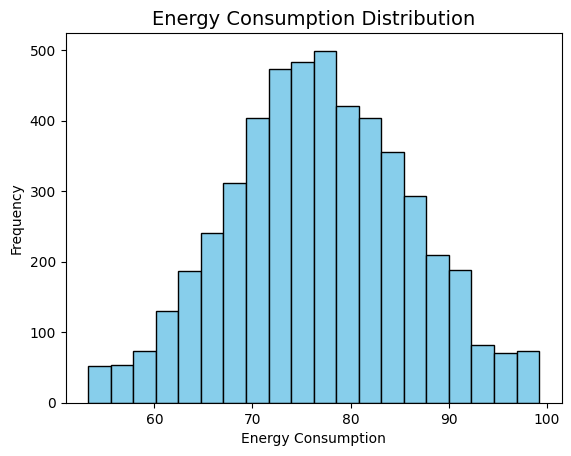

In [8]:
plt.hist(df['EnergyConsumption'], bins=20, color='skyblue', edgecolor='black')
plt.title("Energy Consumption Distribution", fontsize=14)
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.show()

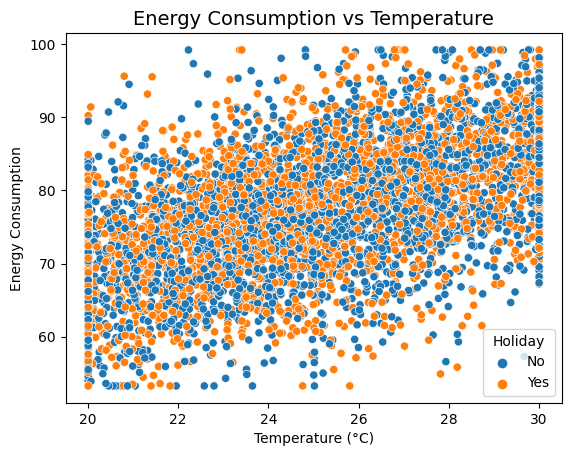

In [9]:
sns.scatterplot(data=df, x='Temperature', y='EnergyConsumption', hue='Holiday')
plt.title("Energy Consumption vs Temperature", fontsize=14)
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy Consumption")
plt.show()

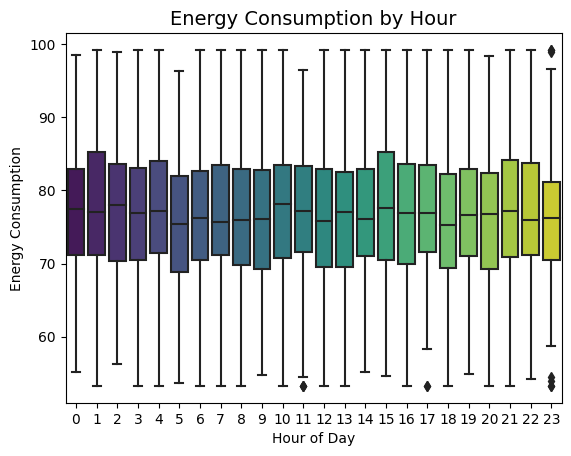

In [10]:
sns.boxplot(data=df, x='Hour', y='EnergyConsumption', palette='viridis')
plt.title("Energy Consumption by Hour", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Energy Consumption")
plt.show()

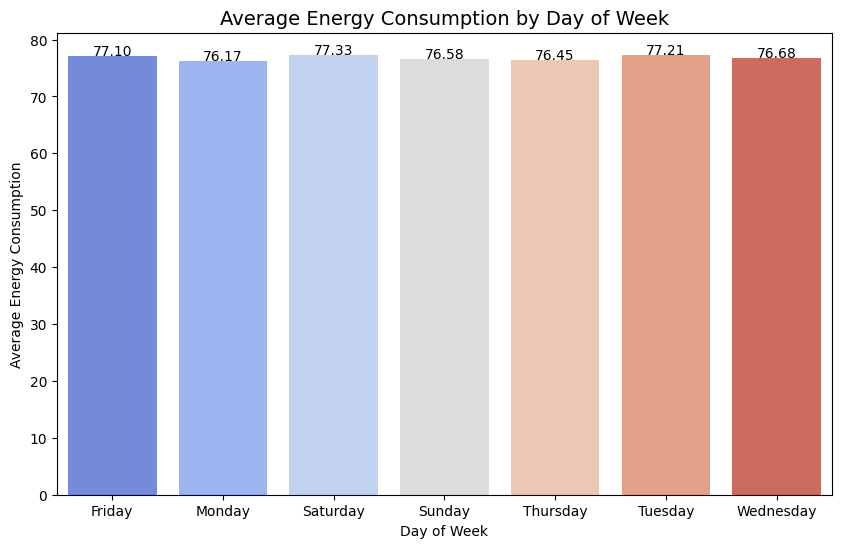

In [11]:
avg_consumption = df.groupby('DayOfWeek')['EnergyConsumption'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_consumption, x='DayOfWeek', y='EnergyConsumption', palette='coolwarm')

for index, row in avg_consumption.iterrows():
    plt.text(index, row['EnergyConsumption'] + 0.1, f"{row['EnergyConsumption']:.2f}", 
             ha='center', fontsize=10)

plt.title("Average Energy Consumption by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Average Energy Consumption")
plt.show()

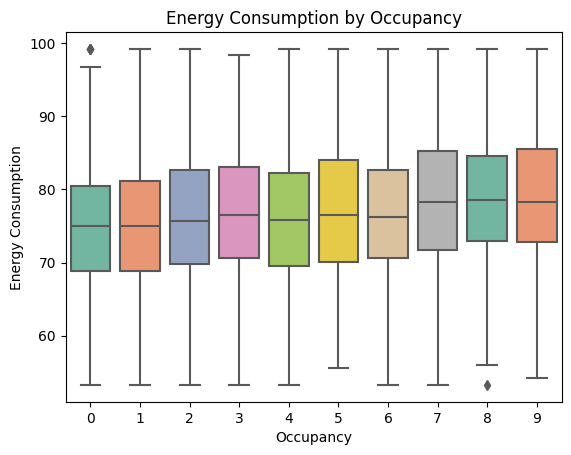

In [12]:
sns.boxplot(data=df, x='Occupancy', y='EnergyConsumption', palette='Set2')
plt.title("Energy Consumption by Occupancy")
plt.xlabel("Occupancy")
plt.ylabel("Energy Consumption")
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Correlation Analysis</div>

In [13]:
encoder = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])

print("Converted DataFrame:")

df.info()

Converted DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   int64  
 3   Holiday            5000 non-null   int64  
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   int64  
 9   LightingUsage      5000 non-null   int64  
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 468.9 KB


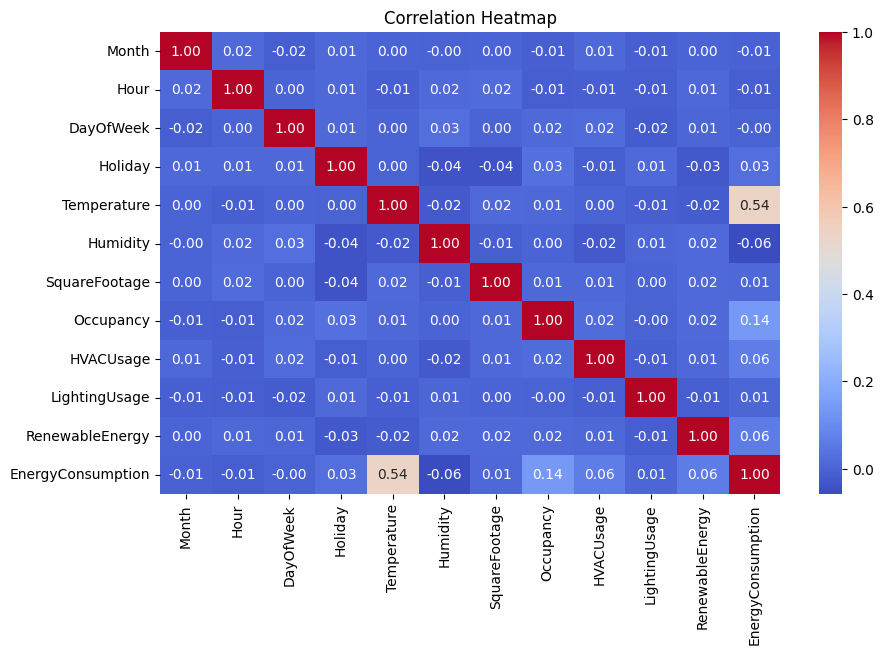

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of model performance : Machine Learning</div>

In [15]:
X = df.drop('EnergyConsumption', axis=1)
y = df['EnergyConsumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, tol=1e-4),  
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=3),
#    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
#    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  

    mse = mean_squared_error(y_test, y_pred)  
    r2 = r2_score(y_test, y_pred)  
    
    return mse, r2

In [16]:
results = {}

for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {"MSE": mse, "R²": r2}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)

results_df

,MSE,R²
ElasticNet,60.687884,0.272893
Polynomial Regression,60.806321,0.271474
Bayesian Ridge,61.061303,0.268419
Linear Regression,61.092712,0.268042
SVR,61.686561,0.260927
Random Forest,63.337328,0.241149
XGBoost,73.408455,0.120486
KNN,79.380377,0.048936


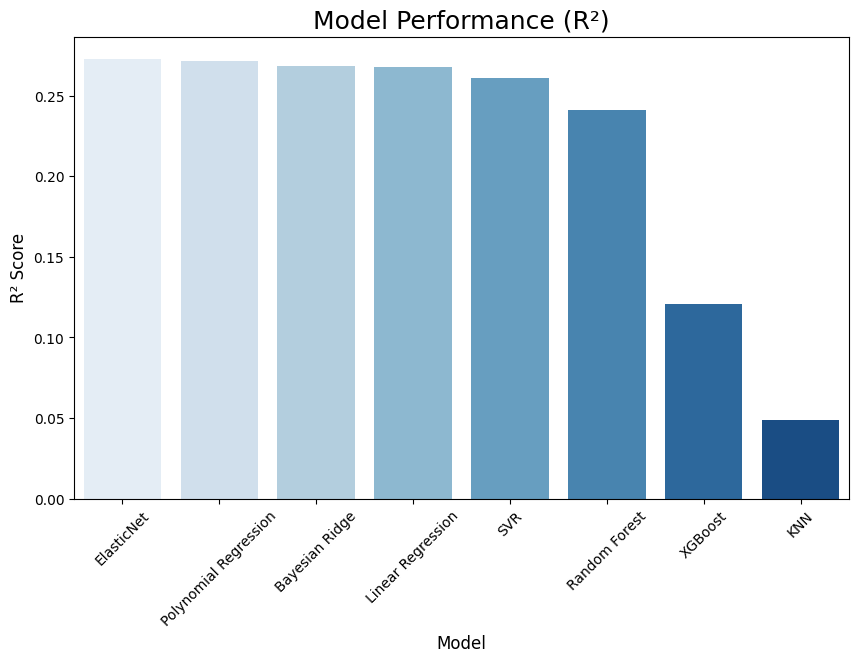

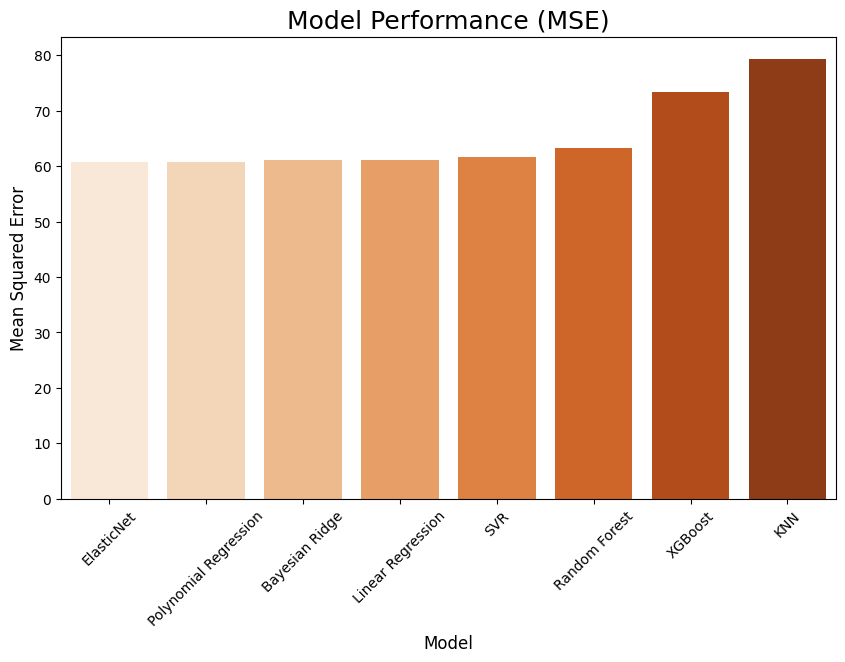

Best Model:
MSE    60.687884
R²      0.272893
Name: ElasticNet, dtype: float64


In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="R²", data=results_df, palette="Blues")
plt.title("Model Performance (R²)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="MSE", data=results_df, palette="Oranges")
plt.title("Model Performance (MSE)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.xticks(rotation=45)
plt.show()

best_model = results_df.loc[results_df["R²"].idxmax()]
print("Best Model:")
print(best_model)

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of model performance : Deep Learning</div>

In [18]:
# Single Neural Network Model
nn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

nn_history = nn_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

nn_pred = nn_model.predict(X_test_scaled).flatten()
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)

print(f"Single Neural Network (NN) - MSE: {nn_mse:.4f}, R2: {nn_r2:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Single Neural Network (NN) - MSE: 62.5094, R2: 0.2511


In [19]:
# MLP Model
mlp_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  
])

mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

mlp_history = mlp_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

mlp_pred = mlp_model.predict(X_test_scaled).flatten()
mlp_mse = mean_squared_error(y_test, mlp_pred)
mlp_r2 = r2_score(y_test, mlp_pred)

print(f"MLP Model - MSE: {mlp_mse:.4f}, R2: {mlp_r2:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MLP Model - MSE: 78.7479, R2: 0.0565


In [20]:
# ANN Model
ann_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)), 
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  
])

ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

ann_history = ann_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

ann_pred = ann_model.predict(X_test_scaled).flatten()
ann_mse = mean_squared_error(y_test, ann_pred)
ann_r2 = r2_score(y_test, ann_pred)

print(f"ANN Model - MSE: {ann_mse:.4f}, R2: {ann_r2:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
ANN Model - MSE: 66.3430, R2: 0.2051


In [21]:
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# RNN Model
rnn_model = Sequential([
    Input(shape=(1, X_train_scaled.shape[1])),  
    SimpleRNN(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1) 
])

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

rnn_history = rnn_model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

rnn_pred = rnn_model.predict(X_test_rnn).flatten()
rnn_mse = mean_squared_error(y_test, rnn_pred)
rnn_r2 = r2_score(y_test, rnn_pred)

print(f"RNN Model - MSE: {rnn_mse:.4f}, R2: {rnn_r2:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
RNN Model - MSE: 62.2673, R2: 0.2540


In [22]:
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# LSTM Model
lstm_model = Sequential([
    Input(shape=(1, X_train_scaled.shape[1])),  
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dense(1) 
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

lstm_history = lstm_model.fit(X_train_lstm, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

lstm_pred = lstm_model.predict(X_test_lstm).flatten()
lstm_mse = mean_squared_error(y_test, lstm_pred)
lstm_r2 = r2_score(y_test, lstm_pred)

print(f"LSTM Model - MSE: {lstm_mse:.4f}, R2: {lstm_r2:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
LSTM Model - MSE: 61.0264, R2: 0.2688


In [23]:
results = {}

# 1. Single Neural Network (NN)
nn_pred = nn_model.predict(X_test_scaled).flatten()
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)
results["Single Neural Network (NN)"] = {"MSE": nn_mse, "R²": nn_r2}

# 2. RNN Model
rnn_pred = rnn_model.predict(X_test_rnn).flatten()
rnn_mse = mean_squared_error(y_test, rnn_pred)
rnn_r2 = r2_score(y_test, rnn_pred)
results["RNN"] = {"MSE": rnn_mse, "R²": rnn_r2}

# 3. MLP Model
mlp_pred = mlp_model.predict(X_test_scaled).flatten()
mlp_mse = mean_squared_error(y_test, mlp_pred)
mlp_r2 = r2_score(y_test, mlp_pred)
results["MLP"] = {"MSE": mlp_mse, "R²": mlp_r2}

# 4. ANN Model
ann_pred = ann_model.predict(X_test_scaled).flatten()
ann_mse = mean_squared_error(y_test, ann_pred)
ann_r2 = r2_score(y_test, ann_pred)
results["ANN"] = {"MSE": ann_mse, "R²": ann_r2}

# 5. LSTM Model
lstm_pred = lstm_model.predict(X_test_lstm).flatten()
lstm_mse = mean_squared_error(y_test, lstm_pred)
lstm_r2 = r2_score(y_test, lstm_pred)
results["LSTM"] = {"MSE": lstm_mse, "R²": lstm_r2}

results_df2 = pd.DataFrame(results).T
results_df2 = results_df2.sort_values(by="R²", ascending=False)
results_df2

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,MSE,R²
LSTM,61.026398,0.268837
RNN,62.267253,0.253970
Single Neural Network (NN),62.509383,0.251069
ANN,66.343027,0.205138
MLP,78.747928,0.056514


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>

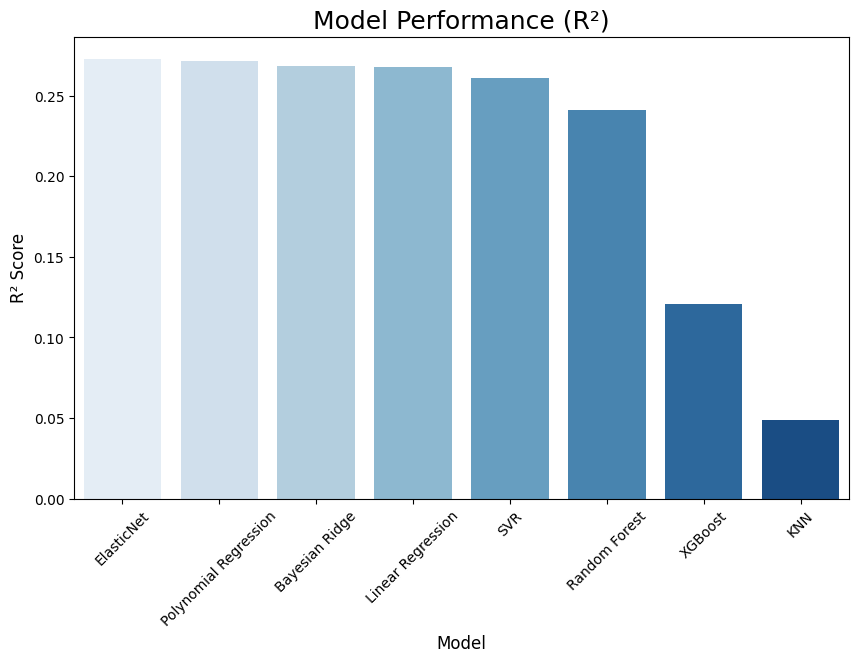

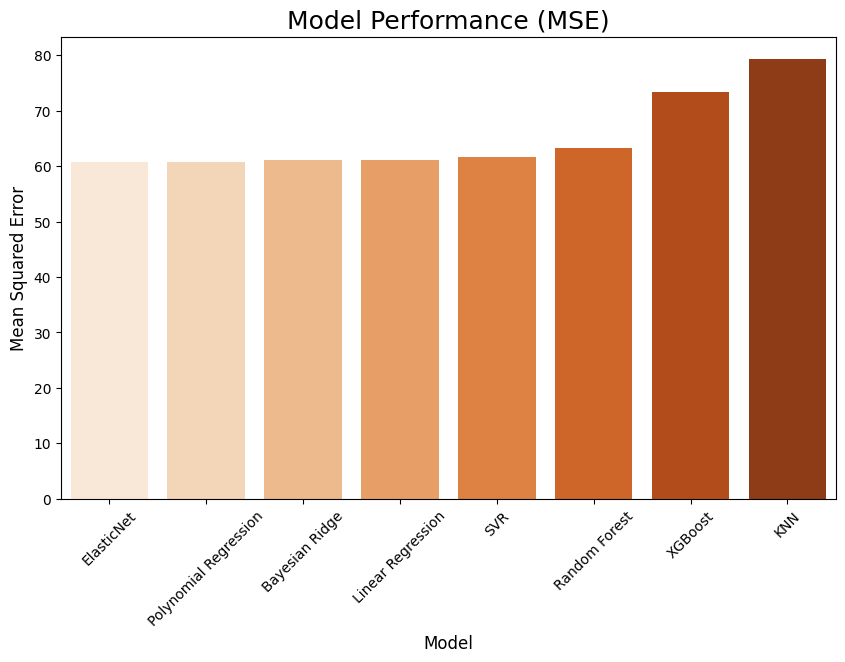

Best Model:
MSE    60.687884
R²      0.272893
Name: ElasticNet, dtype: float64


In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="R²", data=results_df, palette="Blues")
plt.title("Model Performance (R²)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="MSE", data=results_df, palette="Oranges")
plt.title("Model Performance (MSE)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.xticks(rotation=45)
plt.show()

best_model = results_df.loc[results_df["R²"].idxmax()]
print("Best Model:")
print(best_model)

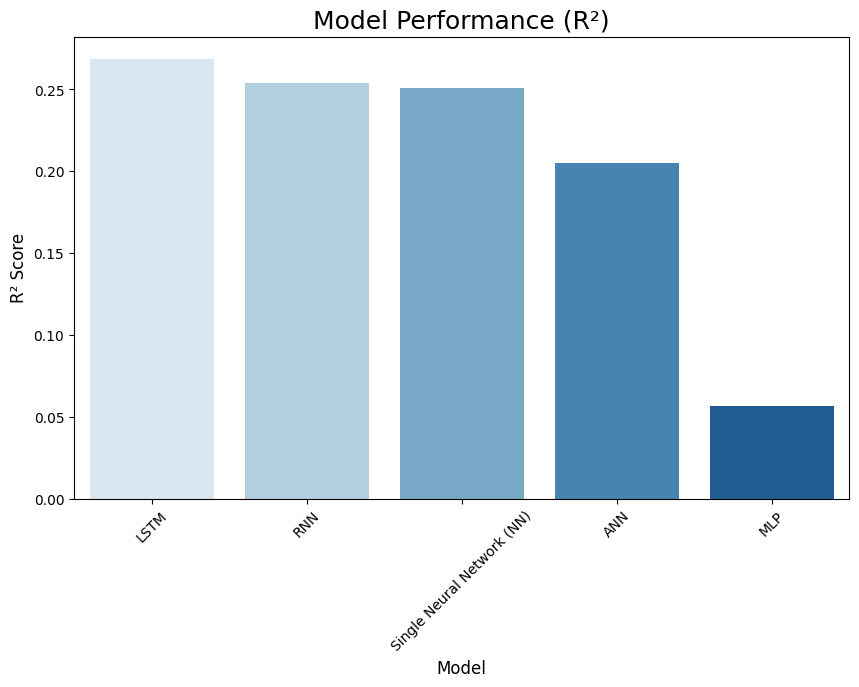

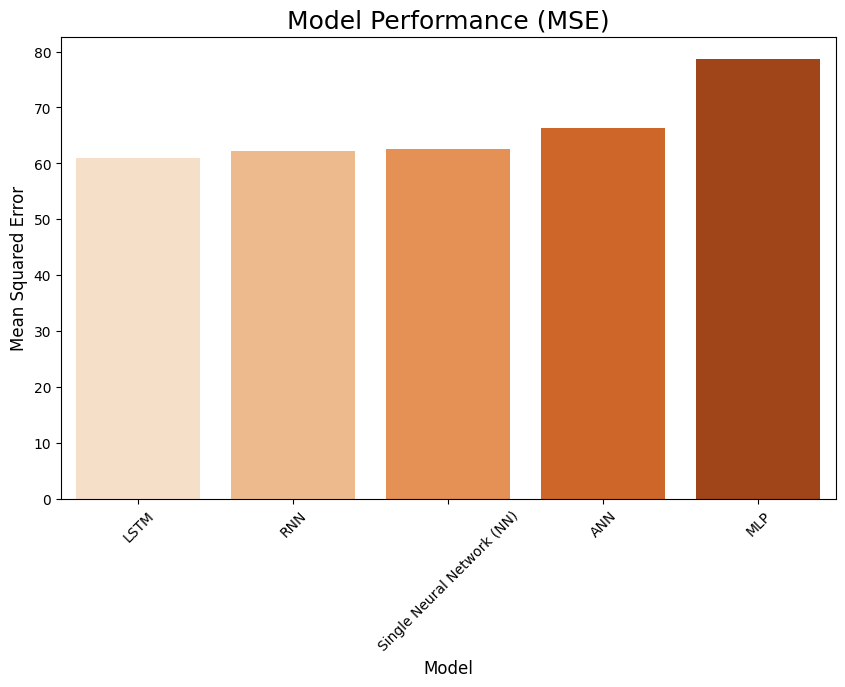

Best Model:
MSE    61.026398
R²      0.268837
Name: LSTM, dtype: float64


In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df2.index, y="R²", data=results_df2, palette="Blues")
plt.title("Model Performance (R²)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df2.index, y="MSE", data=results_df2, palette="Oranges")
plt.title("Model Performance (MSE)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.xticks(rotation=45)
plt.show()

best_model = results_df2.loc[results_df2["R²"].idxmax()]
print("Best Model:")
print(best_model)

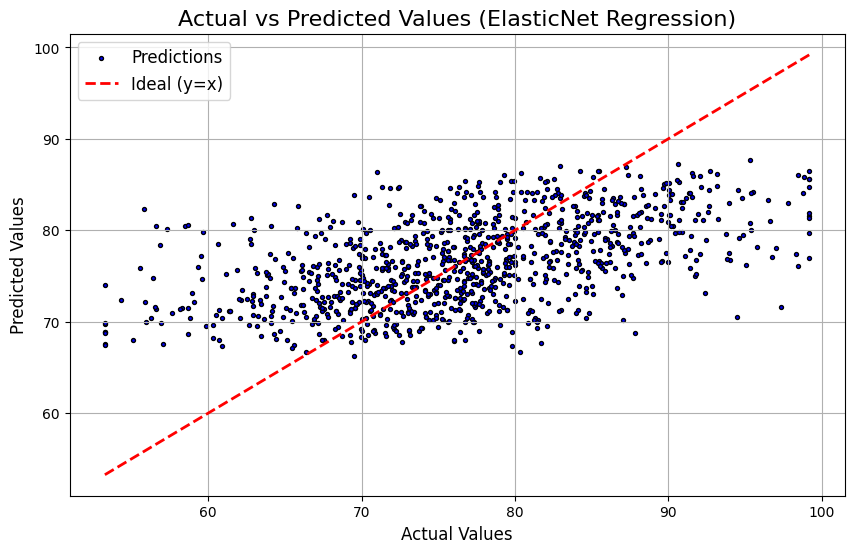

ElasticNet Regression Result: MSE = 60.5820, R² = 0.2742


In [26]:
alpha = 1.0  
l1_ratio = 0.5 

model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', s=8, edgecolor='black', label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal (y=x)')

plt.title('Actual vs Predicted Values (ElasticNet Regression)', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'ElasticNet Regression Result: MSE = {mse:.4f}, R² = {r2:.4f}')

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Thanks !</div><br><br>

<h3> If you have any questions, please feel free to ask me a question and use the code freely ! </h3><br>

<div style="text-align: center;">
    <a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
    <a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a></div>